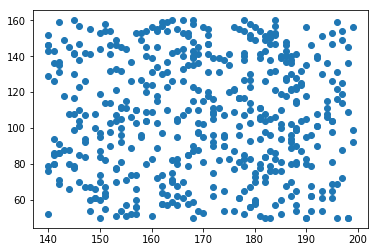

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("./500_Person_Gender_Height_Weight_Index.csv")
plt.scatter(np.array(data["Height"]), np.array(data["Weight"]))
plt.show()


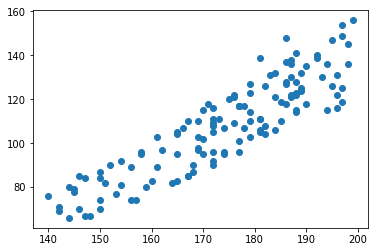

In [14]:
#Since, there is no relationship between height and weight, let's select a class of people(Underweight or overweight...)
data = data[data["Index"] == 4]
plt.scatter(np.array(data["Height"]), np.array(data["Weight"]))
plt.show()
data = data[["Height", "Weight"]]


0 596062
1 186746.685612
2 70171.0430497
3 36968.6195101
4 27511.1624438
5 24816.3499249
6 24047.5609614
7 23827.310029
8 23763.2847318
9 23743.7532124
10 23736.8938713
11 23733.6438126
12 23731.4218938
13 23729.4929969
14 23727.6477579
15 23725.8265493
16 23724.0123889
17 23722.20044
18 23720.3893252
19 23718.5786521
20 23716.7683089
21 23714.9582638
22 23713.1485077
23 23711.3390378
24 23709.5298535
25 23707.7209545
26 23705.9123407
27 23704.1040121
28 23702.2959684
29 23700.4882099
30 23698.6807363
31 23696.8735476
32 23695.0666439
33 23693.2600249
34 23691.4536908
35 23689.6476415
36 23687.8418769
37 23686.0363969
38 23684.2312016
39 23682.4262908
40 23680.6216646
41 23678.8173228
42 23677.0132656
43 23675.2094927
44 23673.4060041
45 23671.6027999
46 23669.79988
47 23667.9972442
48 23666.1948927
49 23664.3928253
50 23662.5910419
51 23660.7895426
52 23658.9883273
53 23657.187396
54 23655.3867485
55 23653.586385
56 23651.7863052
57 23649.9865092
58 23648.186997
59 23646.3877684
60 23

483 22908.512029
484 22906.8294064
485 22905.1470492
486 22903.4649571
487 22901.7831303
488 22900.1015685
489 22898.4202718
490 22896.7392402
491 22895.0584736
492 22893.377972
493 22891.6977353
494 22890.0177635
495 22888.3380565
496 22886.6586143
497 22884.9794368
498 22883.3005241
499 22881.621876
500 22879.9434926
501 22878.2653738
502 22876.5875195
503 22874.9099297
504 22873.2326044
505 22871.5555435
506 22869.878747
507 22868.2022148
508 22866.5259469
509 22864.8499433
510 22863.1742039
511 22861.4987286
512 22859.8235175
513 22858.1485705
514 22856.4738875
515 22854.7994685
516 22853.1253135
517 22851.4514224
518 22849.7777952
519 22848.1044319
520 22846.4313323
521 22844.7584965
522 22843.0859244
523 22841.413616
524 22839.7415712
525 22838.06979
526 22836.3982723
527 22834.7270182
528 22833.0560275
529 22831.3853002
530 22829.7148363
531 22828.0446358
532 22826.3746985
533 22824.7050246
534 22823.0356138
535 22821.3664662
536 22819.6975817
537 22818.0289604
538 22816.360602


960 22135.2768378
961 22133.7161119
962 22132.155632
963 22130.5953982
964 22129.0354103
965 22127.4756684
966 22125.9161723
967 22124.3569221
968 22122.7979177
969 22121.2391591
970 22119.6806462
971 22118.122379
972 22116.5643574
973 22115.0065815
974 22113.4490511
975 22111.8917663
976 22110.3347269
977 22108.777933
978 22107.2213846
979 22105.6650815
980 22104.1090238
981 22102.5532114
982 22100.9976442
983 22099.4423223
984 22097.8872455
985 22096.3324139
986 22094.7778274
987 22093.223486
988 22091.6693897
989 22090.1155383
990 22088.5619319
991 22087.0085704
992 22085.4554537
993 22083.9025819
994 22082.349955
995 22080.7975727
996 22079.2454353
997 22077.6935424
998 22076.1418943
999 22074.5904907


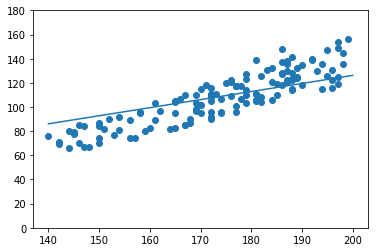

0.66808756847 -7.44131397975


In [15]:
#f(x) = mx+b
#Cost function J = Sigma[ (fx - y)^2 ]/2n , n=number of samples 
m=1
b=1 #random initialisation
n = data.shape[0] #number of samples
def derivative_wrt_slope_m(m, b):
    sum = 0
    for index, row in data.iterrows():
        x = row["Height"]
        y = row["Weight"]
        fx = (m*x) + b
        sum += (fx-y)*x
    sum = sum/n
    return sum

def derivative_wrt_bias_b(m, b):
    sum = 0
    for index, row in data.iterrows():
        x = row["Height"]
        y = row["Weight"]
        fx = (m*x) + b
        sum += (fx-y)
    sum = sum/n
    return sum

alphab = 0.01
alpham = 0.00005
def cost(m,b):
    sum = 0
    for index, row in data.iterrows():
        x = row["Height"]
        y = row["Weight"]
        fx = (m*x) + b
        sum += (fx-y)**2
    return sum
        
for i in range(1000):
    print(i,cost(m, b)) 
    der_wrt_slope_m = derivative_wrt_slope_m(m, b)
    der_wrt_bias_b = derivative_wrt_bias_b(m, b) 
    m = m - (alpham * der_wrt_slope_m)
    b = b - (alphab * der_wrt_bias_b)
    
x_points = [140,200]
y_points = [(140*m)+b,(200*m)+b] 

plt.scatter(np.array(data["Height"]), np.array(data["Weight"]))
axes = plt.gca()
axes.set_ylim([0,180])
plt.plot(x_points, y_points)
plt.show()
print(m, b)
